多くの人が最初に見るであろうtrainとtestの重複を調べたので投稿します。

# 分かることまとめ

- user_id
  - trainにしか存在しないuser_idが14、testにしか存在しないuser_idが204、どちらにも存在するuser_idが1780
  - testの全レコードのうち、trainに含まれていないuser_idのレコードは`23%`
- anime_id
  - trainにしか存在しないanime_idが2、testにしか存在しないanime_idが2、どちらにも存在するanime_idが1952
  - testの全レコードのうち、trainに含まれていないanime_idのレコードは0.001%
  - testにしか存在しないONE PIECE TV版
- Testの中に、user_id, anime_idの両方がtrainに存在しないレコードは1レコード存在する

In [1]:
import polars as pl
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

import japanize_matplotlib

In [2]:
pl.Config.set_fmt_str_lengths(100)

polars.config.Config

In [3]:
!python --version

Python 3.11.3


In [4]:
pl.__version__

'0.18.7'

In [5]:
train = pl.read_csv("../data/train.csv")
anime = pl.read_csv("../data/anime.csv")
test = pl.read_csv("../data/test.csv")

# trainとtestでuser_idがどの程度重複するか

In [6]:
train_user_id_set = set(list(train.get_column("user_id").unique()))
test_user_id_set = set(list(test.get_column("user_id").unique()))

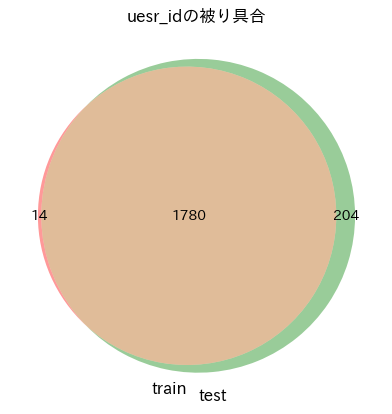

In [7]:
plt.title("uesr_idの被り具合")
venn2([train_user_id_set, test_user_id_set], set_labels = ("train", "test"));

trainにしか存在しないuser_idが14、testにしか存在しないuser_idが204、どちらにも存在するuser_idが1780

In [8]:
only_train_contain_user_id = train_user_id_set.difference(test_user_id_set)
only_test_contain_user_id = test_user_id_set.difference(train_user_id_set)

In [9]:
train.filter(
    pl.col("user_id").is_in(only_train_contain_user_id)
)

user_id,anime_id,score
str,str,i64
"""212c2cc88f6e21ce1f96""","""0d5552c2f719d6291862""",8
"""4baddb50671056c805a6""","""7ced0f68a4990efa8292""",10
"""4baddb50671056c805a6""","""957284ba62454b9fdfe6""",9
"""4baddb50671056c805a6""","""b671013ef40b97a9cec0""",10
"""4fdadf05c816e5334628""","""35d87d3bdeed620ef335""",10
"""4fdadf05c816e5334628""","""a9c6b5719b7861715db5""",10
"""4fdadf05c816e5334628""","""c47e3c4e22b7994b2aa8""",10
"""4fdadf05c816e5334628""","""fbf8b4a3868bea372835""",10
"""504e0d6cdfffe22c5596""","""0d5552c2f719d6291862""",8


In [10]:
test_only_test_contain_user_id = test.filter(
    pl.col("user_id").is_in(only_test_contain_user_id)
)

test_only_test_contain_user_id

user_id,anime_id
str,str
"""00eb399c958546986c29""","""01e4c56439ca58e9c71a"""
"""00eb399c958546986c29""","""0309947ce1d2cab4fb69"""
"""00eb399c958546986c29""","""030a3e39232b5fc784fc"""
"""00eb399c958546986c29""","""036f9083805619fc5b71"""
"""00eb399c958546986c29""","""041995f3f394ba00c88c"""
"""00eb399c958546986c29""","""04373f33f3393382b7e8"""
"""00eb399c958546986c29""","""050c951e7725043a3336"""
"""00eb399c958546986c29""","""0594a0aa2636bb8b5488"""
"""00eb399c958546986c29""","""07726bc2dd546eec8dd9"""


In [11]:
res = test_only_test_contain_user_id.height / test.height
res * 100

22.735307114449846

testの全レコードのうち、trainに含まれていないuser_idのレコードが23%を占めている

# trainとtestでanime_idがどの程度どの程度重複するか

In [12]:
train_anime_id_set = set(list(train.get_column("anime_id").unique()))
test_anime_id_set = set(list(test.get_column("anime_id").unique()))

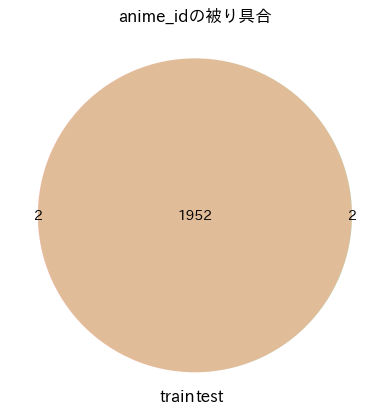

In [13]:
plt.title("anime_idの被り具合")
venn2([train_anime_id_set, test_anime_id_set], set_labels = ("train", "test"));

trainにしかいないアニメが2、testにしかいないアニメが2、どちらにも存在するアニメが1952

In [14]:
only_train_contain_anime_id = train_anime_id_set.difference(test_anime_id_set)
only_test_contain_anime_id = test_anime_id_set.difference(train_anime_id_set)

In [15]:
anime.filter(
    pl.col("anime_id").is_in(only_train_contain_anime_id)
)

anime_id,genres,japanese_name,type,episodes,aired,producers,licensors,studios,source,duration,rating,members,watching,completed,on_hold,dropped,plan_to_watch
str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,i64,i64
"""1e9b3a43745594039e42""","""Slice of Life, Comedy, Romance""","""ヲタクに恋は難しい OAD""","""OVA""","""2""","""Mar 29, 2019 to Feb 26, 2021""","""Aniplex, Half H.P Studio, Fujipacific Music""","""Unknown""","""A-1 Pictures, Lapin Track""","""Web manga""","""22 min. per ep.""","""PG-13 - Teens 13 or older""",90626,46279,327,10053,857,33110
"""867934bc2a611a8423da""","""Sci-Fi, Mystery, Psychological, Thriller, Shounen""","""約束のネバーランド""","""TV""","""11""","""Jan 8, 2021 to ?""","""Aniplex, Shueisha""","""Aniplex of America""","""CloverWorks""","""Manga""","""22 min. per ep.""","""R - 17+ (violence & profanity)""",482725,260775,60,6458,6966,208466


In [16]:
anime.filter(
    pl.col("anime_id").is_in(only_test_contain_anime_id)
)

anime_id,genres,japanese_name,type,episodes,aired,producers,licensors,studios,source,duration,rating,members,watching,completed,on_hold,dropped,plan_to_watch
str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,i64,i64
"""21f8d20251a4f9d150c5""","""Action, Seinen""","""はたらく細胞BLACK""","""TV""","""13""","""Jan 10, 2021 to ?""","""Aniplex, Kodansha, Studio Mausu, Tokyo MX, NetEase""","""Aniplex of America""","""LIDENFILMS""","""Manga""","""23 min. per ep.""","""PG-13 - Teens 13 or older""",123446,56958,16,2262,1843,62367
"""d7cee297224130410c3b""","""Action, Adventure, Comedy, Super Power, Drama, Fantasy, Shounen""","""ONE PIECE""","""TV""","""Unknown""","""Oct 20, 1999 to ?""","""Fuji TV, TAP, Shueisha""","""Funimation, 4Kids Entertainment""","""Toei Animation""","""Manga""","""24 min.""","""PG-13 - Teens 13 or older""",1352724,887333,33,187919,136245,141194


testにしかないONE PIECEえぐいて

In [17]:
anime.filter(
    pl.col("japanese_name").str.contains("ONE PIECE")
)

anime_id,genres,japanese_name,type,episodes,aired,producers,licensors,studios,source,duration,rating,members,watching,completed,on_hold,dropped,plan_to_watch
str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,i64,i64
"""a929e31a2bba9980dd82""","""Action, Adventure, Comedy, Drama, Fantasy, Shounen""","""ONE PIECE FILM GOLD""","""Movie""","""1""","""Jul 23, 2016""","""Unknown""","""Funimation""","""Toei Animation""","""Manga""","""2 hr.""","""PG-13 - Teens 13 or older""",121306,2388,100649,550,372,17347
"""ab0d17de9ade9bc13c64""","""Action, Adventure, Comedy, Drama, Fantasy, Shounen, Super Power""","""劇場版『ONE PIECE STAMPEDE』（スタンピード）""","""Movie""","""1""","""Aug 9, 2019""","""Unknown""","""Unknown""","""Toei Animation""","""Manga""","""1 hr. 41 min.""","""PG-13 - Teens 13 or older""",77375,1467,57450,373,206,17879
"""d7cee297224130410c3b""","""Action, Adventure, Comedy, Super Power, Drama, Fantasy, Shounen""","""ONE PIECE""","""TV""","""Unknown""","""Oct 20, 1999 to ?""","""Fuji TV, TAP, Shueisha""","""Funimation, 4Kids Entertainment""","""Toei Animation""","""Manga""","""24 min.""","""PG-13 - Teens 13 or older""",1352724,887333,33,187919,136245,141194
"""eb25d8bf9c986ad62c41""","""Action, Adventure, Comedy, Super Power, Fantasy, Shounen""","""ONE PIECE""","""Movie""","""1""","""Mar 4, 2000""","""Unknown""","""Unknown""","""Toei Animation""","""Manga""","""50 min.""","""PG-13 - Teens 13 or older""",82437,1081,72673,408,357,7918


anime全体にはONE PIECE作品が4件あるから、同じ作品グループを作ると推論できるかもしれない、ただしTV版とMovie版はだいぶ評価が分かれそう

In [18]:
test_only_test_contain_anime_id = test.filter(
    pl.col("anime_id").is_in(only_test_contain_anime_id)
)

test_only_test_contain_anime_id

user_id,anime_id
str,str
"""332a8a7544b04e35b059""","""d7cee297224130410c3b"""
"""f6beb17befcf1afc0e0d""","""21f8d20251a4f9d150c5"""


In [19]:
res = test_only_test_contain_anime_id.height / test.height
res * 100

0.0016995819028518986

testの全レコードのうち、trainに含まれていないanime_idのレコードは0.001%

# Testの中に、user_id, anime_idの両方がtrainに存在しないものはあるか

In [20]:
test.filter(
    (pl.col("user_id").is_in(only_test_contain_user_id)) & (pl.col("anime_id").is_in(only_test_contain_anime_id))
)

user_id,anime_id
str,str
"""332a8a7544b04e35b059""","""d7cee297224130410c3b"""


Testの中に、user_id, anime_idの両方がtrainに存在しないレコードは1レコード存在する

この行を推論するには何かしらの方法で特徴量を付与する必要がある